### Actividad 8 - Punto 4

Un ciclista debe llevar en su mochila algunos alimentos de tal manera que pueda asegurar un total minimo de 2000 calorias para soportar un recorrido de 4 horas. La mochila solo tiene capacidad para llevar un peso maximo de 2.0 kg.  

<table>
    <tr>
        <th>Alimento</th>
        <th>Calorias</th>
        <th>Peso (Kg.)</th>
    </tr>
    <tr>
        <td>Leche</td>
        <td>500</td>
        <td>0.5</td>
    </tr>
    <tr>
        <td>Galleta</td>
        <td>300</td>
        <td>0.1</td>
    </tr>
    <tr>
        <td>Agua</td>
        <td>100</td>
        <td>0.5</td>
    </tr>
    <tr>
        <td>Pollo</td>
        <td>700</td>
        <td>0.25</td>
    </tr>
    <tr>
        <td>Huevo</td>
        <td>300</td>
        <td>0.15</td>
    </tr>
    <tr>
        <td>Nueces</td>
        <td>400</td>
        <td>0.15</td>
    </tr>
    <tr>
        <td>Yogurt</td>
        <td>500</td>
        <td>0.5</td>
    </tr>
    <tr>
        <td>Manzana</td>
        <td>400</td>
        <td>0.3</td>
    </tr>
</table>


In [1]:
# calorias
v = [500, 300, 100, 700, 300, 400, 500, 400]
# peso (gr.)
w = [500, 100, 500, 250, 150, 150, 500, 300]
# capacidad total de 2 Kg. == 2000 gr.
C = 2000

#### Programacion Dinamica

In [2]:
def programacion_dinamica (v,w,C):
  
    N = len(v)
    m = {}

    for c in range(C+1):
        m[(0,c)] = 0
    
    for i in range(1, N+1):
        for c in range(0, C+1, 50):
            if w[i-1]<= c:
                m[(i,c)] = max(m[i-1,c], v[i-1] + m[(i-1,c-w[i-1])])
            else:
                m[(i,c)] = m[(i-1,c)]
    
   
    return m[(N,C)]

In [3]:
res = programacion_dinamica(v, w, C)

print(f"Valor Optimo de Calorias: {res}")

Valor Optimo de Calorias: 3100


#### Algoritmo Genetico

In [4]:
import random

REPRODUCTION_RATE = 0.3
CROSSOVER_RATE = 0.5
MUTATION_RATE = 0.02
GENERATIONS = 300

In [5]:
def poblacion_inicial(poblacion_size):
    poblacion = []
    for _ in range(poblacion_size): 
        # selecciona de manera random ciertos alimentos. 1 = seleccionado, 0 = no seleccionado
        individuo = [random.choice([0,1]) for i in range(8)] 
        poblacion.append(individuo)
    return poblacion

In [6]:
def fitness(individuo):
    # suma el total de las calorias de los alimentos seleccionados del individuo
    total_calorias = sum([ v[idx] for idx,val in enumerate(individuo) if val==1])
    # suma el total de los gramos de los alimentos seleccionados del individuo
    total_gramos = sum([ w[idx] for idx,val in enumerate(individuo) if val==1])
    
    # total_gramos debe ser <= a la capacidad maxima
    if total_gramos <= C:
        return total_calorias

    return 0

In [7]:
def seleccion(poblacion):
    """
        Selecciona 4 padres que competiran
        entre ellos para ser los 2 padres seleccionados
    """
    padres = []

    random.shuffle(poblacion)

    if fitness(poblacion[0]) > fitness(poblacion[1]):
        padres.append(poblacion[0])
    else:
        padres.append(poblacion[1])

    if fitness(poblacion[2]) > fitness(poblacion[3]):
        padres.append(poblacion[2])
    else:
        padres.append(poblacion[3])

    return padres

In [8]:
def crossover(padres):
    # primera mitad del padre 0 + segunda mitad padre 1
    hijo1 = padres[0][:4] + padres[1][4:]
    # primera mitad padre 1 + segunda mitad padre 0
    hijo2 = padres[1][:4] + padres[0][4:]

    return [hijo1, hijo2]

In [9]:
def mutacion(individuo):
    """
        Se mutal al individuo moviendo de lugar ciertos valores
    """
    for swapped in range(len(individuo)):
        swapWith = int(random.random() * len(individuo))
        individuo[swapped], individuo[swapWith] = individuo[swapWith], individuo[swapped]
    return individuo

In [10]:
def next_generation(poblacion):
    next_gen = []
    while len(next_gen) < len(poblacion):
        hijos_next_gen = []

        # seleccionamos dos padres
        padres = seleccion(poblacion)

        # reproduccion
        if random.random() < REPRODUCTION_RATE:
            # los padres pasan los genes hacia la siguiente generacion
            hijos_next_gen = padres
        else:
            # crossover
            if random.random() < CROSSOVER_RATE:
                # los padres generan nuevos hijos con partes de cada padre
                hijos_next_gen = crossover(padres)

            # mutacion
            if random.random() < MUTATION_RATE:
                hijos_mutados = []
                for child in hijos_next_gen:
                    # se muta cada hijo
                    hijos_mutados.append(mutacion(child))
                hijos_next_gen = hijos_mutados

        next_gen.extend(hijos_next_gen)

    return next_gen[:len(poblacion)]

In [11]:
def get_pop_fitness(poblacion):
    pop_fitness = []
    for ind in poblacion:
        pop_fitness.append(fitness(ind))
    return max(pop_fitness)

In [12]:
def algoritmo_genetico():
    # creamos la poblacion inicial
    poblacion = poblacion_inicial(10)

    pop_best_fitnesses = []

    # iteramos x cantidad de generaciones
    for _ in range(GENERATIONS):
        poblacion = next_generation(poblacion)
        pop_best_fitnesses.append(get_pop_fitness(poblacion))
    
    # de la poblacion final despues de iterar por cada generacion, seleccionamos el mejor individuo
    poblacion = sorted(poblacion, key=lambda i: fitness(i), reverse=True)
    
    return poblacion[0], pop_best_fitnesses

In [13]:
individuo_optimo, pop_best_fitnesses = algoritmo_genetico()
print(individuo_optimo)

[1, 1, 0, 1, 1, 1, 1, 1]


In [14]:
def evaluacion(individuo):
    total_calorias = sum([ v[idx] for idx,val in enumerate(individuo) if val==1])
    total_gramos = sum([ w[idx] for idx,val in enumerate(individuo) if val==1])
    
    print(f"Total Calorias: {total_calorias}, Total Gramos: {total_gramos}")

In [15]:
evaluacion(individuo_optimo)

Total Calorias: 3100, Total Gramos: 1950


#### Ploteo de los Mejores Fitnesses de Cada Generacion

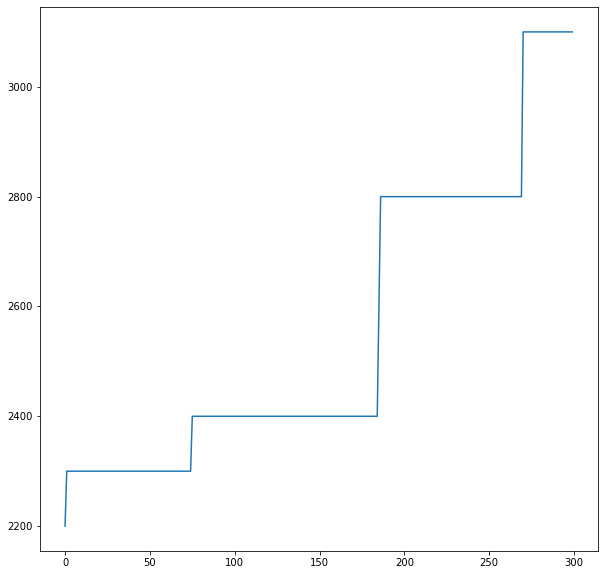

In [16]:
import matplotlib.pyplot as plt

plt_1 = plt.figure(figsize=(10, 10))

plt.plot(pop_best_fitnesses)
plt.show()